This example is adapted from the Keras TensorFlow site. See [the original code here](https://www.tensorflow.org/tutorials/quickstart/beginner)

In [2]:
# using Keras in TensorFlow

import tensorflow as tf

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [6]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax'),
])

W1203 09:58:11.336538 4471320000 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.2498 - acc: 0.9228 - val_loss: 0.1115 - val_acc: 0.9661
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1056 - acc: 0.9677 - val_loss: 0.1054 - val_acc: 0.9679
Epoch 3/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0744 - acc: 0.9772 - val_loss: 0.0802 - val_acc: 0.9767
Epoch 4/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0598 - acc: 0.9826 - val_loss: 0.0808 - val_acc: 0.9778
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0501 - acc: 0.9850 - val_loss: 0.0920 - val_acc: 0.9771
Epoch 6/20
60000/60000 [==============================] 

In [10]:
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

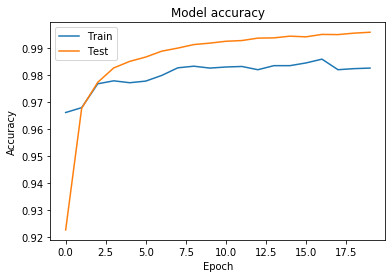

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.13159886472393972
Test accuracy: 0.9825
